In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\Uni work\Engineering Mathematics Work\MDM3\Sky broadband\2019-ISP-Broadband-performance-data.csv')
#print(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3465 non-null   int64  
 1   ISP                                3465 non-null   object 
 2   Technology                         3465 non-null   object 
 3   PACKAGE (download by upload)       3465 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   MarketClass                        3465 non-null   object 
 6   Region                             3465 non-null   object 
 7   Country                            3465 non-null   object 
 8   Geography                          3465 non-null   object 
 9   Download - 24 (ave)                3465 non-null   float64
 10  Download - 24 min(ave)             3465 non-null   float64
 11  Download - 24 max (ave)            3465 non-null   float

In [18]:
skyData = df[df['ISP']== 'Sky']
otherData = df[df['ISP']!= 'Sky']


In [22]:
skyData.describe()

skyData.Technology.value_counts()
df.Technology.value_counts()

FTTC              2100
Cable              529
FTTP               454
ADSL2              293
ADSL1               45
Fixed Wireless      44
Name: Technology, dtype: int64

In [21]:
# % of data for ISP provider Sky 
print(len(skyData)/len(df)*100)
otherData.describe()

8.542568542568544


,unit_id,PACKAGE (download by upload),Download - 24 (ave),Download - 24 min(ave),Download - 24 max (ave),Download - peak (ave),Download - peak min(ave),Download - peak max (ave),Download - 0-6am,Download - 6am-12am,...,Disconnections,YouTubeStartupDelay24hr,YouTubeStartupDelayPeak,NetflixStartupDelay24hr,NetflixStartupDelayPeak,iPlayerStartupDelay24hr,iPlayerStartupDelayPeak,isp_wghts,Natweight,rural_weight
count,3.169000e+03,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3156.000000,3118.000000,...,3168.000000,2669.000000,2363.000000,2760.000000,2444.000000,2663.000000,2357.000000,2790.000000,1700.000000,1690.000000
mean,1.663177e+06,100.293784,87.998703,77.078741,91.481209,86.691048,83.761717,88.972322,88.845285,89.332168,...,0.396806,913.733335,888.408345,992.647511,1055.840925,975.376744,994.838638,1.000000,0.879286,0.954063
std,4.358337e+06,100.643833,97.348667,83.172809,102.851608,95.947237,91.560474,99.690740,98.138737,98.624895,...,1.926980,515.257780,541.428770,643.157194,715.133542,718.979782,688.238384,0.301202,1.205677,0.594665
min,1.323000e+03,8.000000,0.160000,0.140000,0.210000,0.150000,0.140000,0.160000,0.160000,0.160000,...,0.000000,384.920000,372.150000,71.920000,85.260000,149.230000,152.100000,0.237500,0.000000,0.267270
25%,1.724040e+05,38.000000,34.250000,29.990000,35.400000,33.360000,32.550000,34.130000,34.950000,34.777500,...,0.030000,579.780000,573.265000,521.102500,541.695000,563.250000,589.230000,0.887500,0.069100,0.507280
50%,8.149130e+05,76.000000,58.000000,52.450000,59.620000,57.140000,55.800000,58.270000,59.060000,59.115000,...,0.100000,908.580000,885.600000,864.315000,865.955000,792.320000,818.920000,1.000000,0.598000,0.964130
75%,9.484820e+05,76.000000,75.850000,73.810000,76.850000,75.320000,74.670000,75.910000,76.690000,76.717500,...,0.200000,1045.890000,1029.630000,1330.935000,1407.790000,1143.130000,1159.180000,1.000000,1.158650,1.087530
max,3.004837e+07,1000.000000,938.670000,914.660000,939.370000,938.920000,938.200000,939.290000,934.310000,937.660000,...,52.730000,6941.500000,12252.070000,8648.310000,8800.070000,12518.310000,13168.350000,3.150000,6.000100,2.662810


In [215]:
#skyData.shape
otherData.shape

(3169, 78)

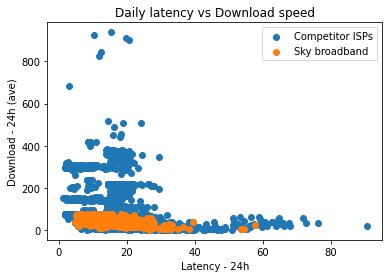

In [289]:
x= df["Latency - 24h"]
y= df["Download - 24 (ave)"]
#print(x)

plt.scatter(x,y,label = "Competitor ISPs")
plt.xlabel("Latency - 24h")
plt.ylabel("Download - 24h (ave)")
plt.title( "Daily latency vs Download speed")

x2= skyData["Latency - 24h"]
y2= skyData["Download - 24 (ave)"]
plt.scatter(x2,y2,label = "Sky broadband")
plt.legend(loc="best")

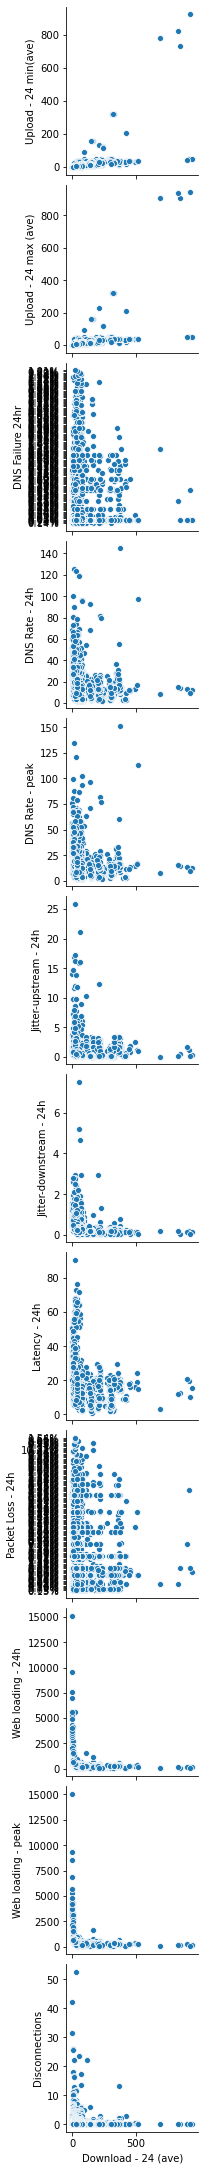

In [16]:
corr= df.corr()
corr["Download - 24 (ave)"].sort_values(ascending=False)
#print(corr)
df.columns.values
features= ['ISP', 'Technology', 'PACKAGE (download by upload)',
       'Distance from exchange - DSL only', 
       'Country', 'Geography', 'Download - 24 (ave)',
       'Download - 24 min(ave)', 'Download - 24 max (ave)',
       'Upload - 24 (ave)', 'Upload - 24 min(ave)',
       'Upload - 24 max (ave)', 
       'DNS Failure 24hr', 'DNS Rate - 24h',
       'DNS Rate - peak', 'Jitter-upstream - 24h',
       'Jitter-downstream - 24h', 'Latency - 24h', 
       'Packet Loss - 24h','Web loading - 24h',
       'Web loading - peak', 'Disconnections']
#            'YouTubeUHD24hr',
#        'YouTubeHD24hr', 'YouTubeSD24hr', 'YouTubeFailed24hr',
#        'YouTubeStartupDelay24hr', 'YouTubeUHDPeak', 'YouTubeHDPeak',
#        'YouTubeSDPeak', 'YouTubeFailedPeak', 'YouTubeStartupDelayPeak',
#        'NetflixUHD24hr', 'NetflixHD24hr', 'NetflixSD24hr',
#        'NetflixFailed24hr', 'NetflixStartupDelay24hr', 'NetflixUHDPeak',
#        'NetflixHDPeak', 'NetflixSDPeak', 'NetflixFailedPeak',
#        'NetflixStartupDelayPeak', 'iPlayerUHD24hr', 'iPlayerHD24hr',
#        'iPlayerSD24hr', 'iPlayerFailed24hr', 'iPlayerStartupDelay24hr',
#        'iPlayerUHDPeak', 'iPlayerHDPeak', 'iPlayerSDPeak',
#        'iPlayerFailedPeak', 'iPlayerStartupDelayPeak', 'isp_wghts',
#        'Natweight', 'rural_weight']

#scatter_matrix(df[features])
#sns.pairplot(df,x_vars=["Download - 24 (ave)"],y_vars=features[0:10])
sns.pairplot(df,x_vars=["Download - 24 (ave)"],y_vars=features[10:])



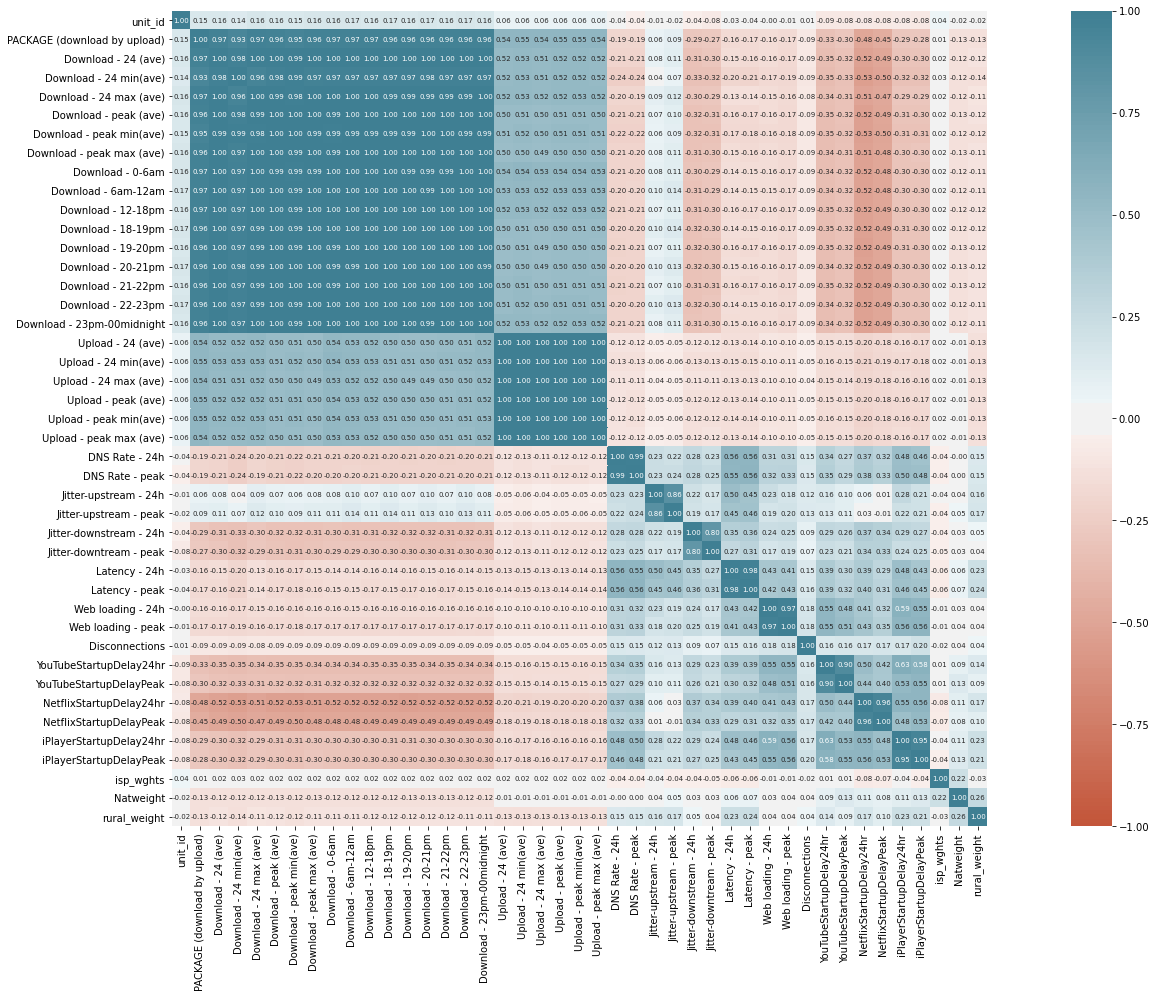

In [290]:
plt.subplots(figsize=(30,15))
sns.heatmap(corr, vmin=-1,annot= True,annot_kws={"size": 7},fmt='.2f',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [13]:
sns.pairplot(df, y_vars=["PACKAGE (download by upload)","Distance from exchange - DSL only","MarketClass","Region","Country","Geography","Download - 24 (ave)","Download - 24 min(ave)","Download - 24 max (ave)"])


ValueError: Must specify `x_vars` and `y_vars`

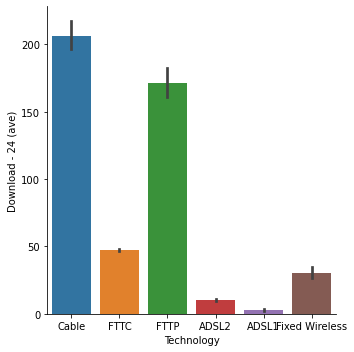

In [219]:

sns.catplot(x="Technology", y="Download - 24 (ave)", kind = "bar",  data=df)

In [220]:
df.groupby("Technology")["Download - 24 (ave)"].mean()

Technology
ADSL1               2.870000
ADSL2              10.118294
Cable             206.481569
FTTC               47.589276
FTTP              171.114736
Fixed Wireless     30.585000
Name: Download - 24 (ave), dtype: float64

In [222]:
skyData.groupby("Technology")["Download - 24 (ave)"].mean()


Technology
ADSL2    12.138163
FTTC     47.891538
Name: Download - 24 (ave), dtype: float64

In [223]:
otherData.groupby("Technology")["Download - 24 (ave)"].mean()

Technology
ADSL1               2.870000
ADSL2               9.712664
Cable             206.481569
FTTC               47.548985
FTTP              171.114736
Fixed Wireless     30.585000
Name: Download - 24 (ave), dtype: float64

In [272]:
df_mod=df
df_mod.loc[df_mod['ISP'] != "Sky", 'ISP'] = 'Competitors'
#print(df_mod)

In [241]:
#df_mod=df_mod.drop(df_mod[df_mod.ISP == 'Sky'].index)
df_mod= df_mod[(df_mod.Technology == "FTTC")|(df_mod.Technology == "ADSL2")]
print(df_mod)


       unit_id          ISP Technology  PACKAGE (download by upload)  \
1         1323  Competitors       FTTC                            76   
3         1360          Sky      ADSL2                            11   
5         1381  Competitors       FTTC                            76   
7         1403  Competitors       FTTC                            76   
9         1404          Sky       FTTC                            76   
...        ...          ...        ...                           ...   
3460   6481369  Competitors       FTTC                            38   
3461  29247893  Competitors       FTTC                            38   
3462  25201485  Competitors       FTTC                            38   
3463  29249389  Competitors       FTTC                            38   
3464  25883373  Competitors       FTTC                            38   

     Distance from exchange - DSL only MarketClass            Region  \
1                                  NaN           B            L

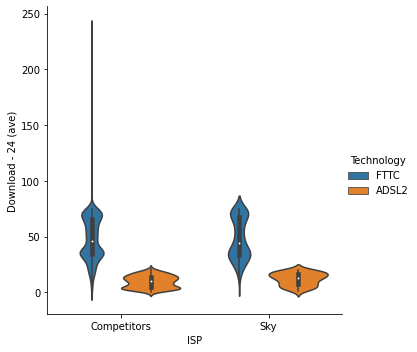

In [246]:

sns.catplot(x= "ISP", y= "Download - 24 (ave)", kind= "violin", hue= "Technology", showfliers = False, data=df_mod)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002923392DC40>]],
      dtype=object)

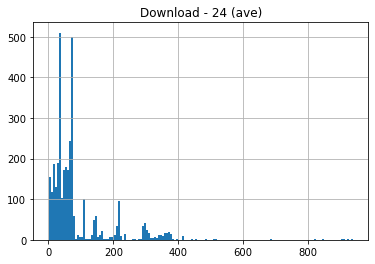

In [274]:

df.hist(column= "Download - 24 (ave)",bins=150)